<a href="https://colab.research.google.com/github/Khey17/100-Days-Of-ML-Code/blob/main/ComputerVision_and_CNN_with_TensorFlow_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What we're going to cover
- Getting a dataset to work with (pizza_steakD)
- Architecture of a convolutional neural network (CNN) with TensorFlow
- An end-to-end binary image classification problem
- Steps in modelling with CNNS
- Creating a CNN, compiling a model, fitting a model, evaluating a model
- An end-to-end multi-class image classification problem
- Making predictions on our own custom images

## Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car
recognizing the car in front.

### Architecture of a CNN
`Input Layer -> Convolution Layer - > Hidden Layer -> Pooling Layer -> Fully Connected Layer -> Output Layer -> Output Activation`

Visit [Tiny VGG](https://poloclub.github.io/cnn-explainer/) to understand more about CNN

In [1]:
# Shape = [None, 224, 224, 3] -> [Batch_Size, width, height, color]


### Get the Data

The images we're working with are from the Food 101 dataset (101 different classes of food): [Food-101](https://www.kaggle.com/dansbecker/food-101)

However we've modified it to only use two classes (pizza 🍕 & steak 🥩 using the image data modification notebook:
[extras-notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.


In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-28 15:51:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  39.7MB/s    in 2.6s    

2024-02-28 15:51:18 (39.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [6]:
import os

# Walk throught pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get our class names programmatically.

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  '''
  View a random image from a target directory and class
  '''
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + '/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (512, 512, 3)


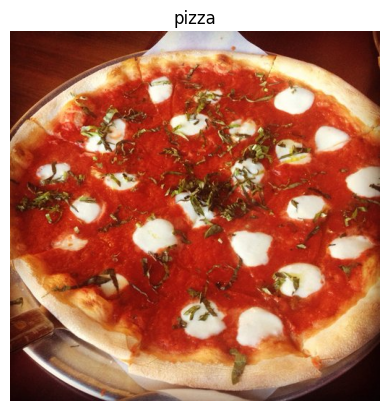

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
# The images we've imported and plotted are actually giant arrays/tensors of a different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[55, 14,  8],
        [53, 12,  6],
        [51, 10,  4],
        ...,
        [58, 15,  8],
        [55, 18,  9],
        [51, 17,  7]],

       [[57, 16, 10],
        [56, 15,  9],
        [55, 14,  8],
        ...,
        [59, 16,  9],
        [55, 18,  9],
        [52, 18,  8]],

       [[56, 15,  9],
        [57, 16, 10],
        [57, 16, 10],
        ...,
        [59, 16,  9],
        [55, 18,  9],
        [52, 18,  8]],

       ...,

       [[24,  5,  7],
        [23,  4,  6],
        [22,  3,  5],
        ...,
        [ 9,  3,  3],
        [ 9,  3,  3],
        [ 8,  2,  2]],

       [[23,  4,  6],
        [22,  3,  5],
        [21,  2,  4],
        ...,
        [ 9,  3,  3],
        [ 9,  3,  3],
        [ 8,  2,  2]],

       [[23,  4,  6],
        [22,  3,  5],
        [20,  1,  3],
        ...,
        [ 9,  3,  3],
        [ 9,  3,  3],
        [ 8,  2,  2]]], dtype=uint8)>

In [12]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with
to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also
referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [13]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.21568627, 0.05490196, 0.03137255],
        [0.20784314, 0.04705882, 0.02352941],
        [0.2       , 0.03921569, 0.01568627],
        ...,
        [0.22745098, 0.05882353, 0.03137255],
        [0.21568627, 0.07058824, 0.03529412],
        [0.2       , 0.06666667, 0.02745098]],

       [[0.22352941, 0.0627451 , 0.03921569],
        [0.21960784, 0.05882353, 0.03529412],
        [0.21568627, 0.05490196, 0.03137255],
        ...,
        [0.23137255, 0.0627451 , 0.03529412],
        [0.21568627, 0.07058824, 0.03529412],
        [0.20392157, 0.07058824, 0.03137255]],

       [[0.21960784, 0.05882353, 0.03529412],
        [0.22352941, 0.0627451 , 0.03921569],
        [0.22352941, 0.0627451 , 0.03921569],
        ...,
        [0.23137255, 0.0627451 , 0.03529412],
        [0.21568627, 0.07058824, 0.03529412],
        [0.20392157, 0.07058824, 0.03137255]],

       ...,

       [[0.09411765, 0.01960784, 0.02745098],
        [0.09019608, 0.01568627, 0.02352941],
        [0.08627451, 0

## An end-to-end example

Let's build a convolutional neural networks to find patterns in our images, more specifically we need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

📖**Resources:** preprocessing_function as a parameter in [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/snormalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Load in the data
print("Loading data...")

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32, # number of images to process
                                               target_size=(224, 224), # convert all images to be 224 x 224 pixels (although)
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# Build a CNN Model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)), # define the input shape
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"), # reduce the size of the feature map
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    # tf.keras.layers.Activations(tf.nn.relu),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Loading data...
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 117ms/step - loss: 0.5801 - accuracy: 0.6940 - val_loss: 0.5196 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 5s 104ms/step - loss: 0.4499 - accuracy: 0.7813 - val_loss: 0.3701 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 5s 100ms/step - loss: 0.4220 - accuracy: 0.8180 - val_loss: 0.3481 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 5s 102ms/step - loss: 0.3884 - accuracy: 0.8373 - val_loss: 0.3315 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 5s 103ms/step - loss: 0.3520 - accuracy: 0.8607 - val_loss: 0.3402 - val_accuracy: 0.8480


> 🔑 **Note:** If the above cell is taking longer than ~10s per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have rerun some cells above).

**Understand More about Covolutional Layers, MaxPool Layers Check out the following links:**

📖**Resources:**

- [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

- [*Deep Lizard Playlist on Neural Networks*](https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)

- [*Understanding Convolution Operations In Neural Networks*](https://deeplizard.com/resource/pavq7noze2)

- [*Understanding Max Pooling Operations In Neural Networks*](https://deeplizard.com/resource/pavq7noze3)


In [15]:
# Get a model summary()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### Using the same Example as before

Let's replicate the model we've built in a previous section to
see if it works with our image data.

The model we're building is from the TensorFlow playground.

In [16]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # output layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 6s 108ms/step - loss: 0.8130 - accuracy: 0.7153 - val_loss: 0.8960 - val_accuracy: 0.6280
Epoch 2/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6849 - accuracy: 0.7053 - val_loss: 0.4612 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.5591 - accuracy: 0.7527 - val_loss: 0.5018 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 5s 105ms/step - loss: 0.5817 - accuracy: 0.7513 - val_loss: 0.5718 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 5s 103ms/step - loss: 0.4188 - accuracy: 0.8200 - val_loss: 0.5315 - val_accuracy: 0.7400


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 16)                2408464   
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2408753 (9.19 MB)
Trainable params: 2408753 (9.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Despite having 20x more parameters than our CNN model (model_1), model_2 performs poorly... let's try to improve it.**

In [18]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 6s 106ms/step - loss: 2.4268 - accuracy: 0.6720 - val_loss: 2.1251 - val_accuracy: 0.5720
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 1.5559 - accuracy: 0.6947 - val_loss: 0.6807 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 1.1228 - accuracy: 0.7267 - val_loss: 0.7580 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.9206 - accuracy: 0.7400 - val_loss: 0.8959 - val_accuracy: 0.7020
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 1.0281 - accuracy: 0.7367 - val_loss: 2.7102 - val_accuracy: 0.5620


In [19]:
# Get a summary() of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 32)                4816928   
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4818017 (18.38 MB)
Trainable params: 4818017 (18.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is
better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Wehere a
series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of
possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.**
So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in
dechiphering between different **features** in an image.

## Binary Classification: Let's Break it down

1. Become one with the data (visualizae, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches).
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


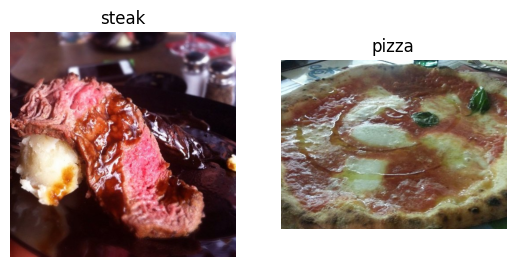

In [20]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(train_dir, "steak")
plt.subplot(1, 2, 2)
not_steak_img = view_random_image(train_dir, 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [21]:
# define the directory dataset paths
train_dir, test_dir

('pizza_steak/train/', 'pizza_steak/test/')

Our next step is to turn our data into **batches**.

A batch is a small subset of data, Rather than look at all ~20.000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

why 32?

Because 32 is good for your health...[says Yann LeCun](https://twitter.com/ylecun/status/989610208497360896?lang=en)

In [22]:
!nvidia-smi

Wed Feb 28 15:52:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0              40W / 300W |   1870MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [24]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224), # Target size of images (height, width)
                                               batch_size=32, # size of minibatches
                                               class_mode="binary", # type of data we're working with
                                               seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of train data batch
images, labels = train_data.next() # get the next batch of images/labels in the data
len(images), len(labels)


(32, 32)

In [26]:
# How many batches are there?
len(train_data)


47

In [27]:
# Get the first two images
images[:2], images[0].shape


(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [28]:
images[7].shape

(224, 224, 3)

In [29]:
# View the first batch of labels
labels, len(labels)

(array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
        0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
       dtype=float32),
 32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [30]:
# Make the creating of our model a little easier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from tensorflow.keras.optimizers import Adam


In [31]:
# Create the model (this is our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # No. of sliding windows
           kernel_size=3, # filter size
           strides=1, # step size
           padding="valid", # used for prevent loss of information/preserve input shape
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data, # combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 6s 107ms/step - loss: 1.0057 - accuracy: 0.6860 - val_loss: 0.4471 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 5s 102ms/step - loss: 0.4010 - accuracy: 0.8233 - val_loss: 0.3702 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.2936 - accuracy: 0.8847 - val_loss: 0.3825 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 5s 102ms/step - loss: 0.1713 - accuracy: 0.9413 - val_loss: 0.4480 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 5s 109ms/step - loss: 0.0777 - accuracy: 0.9787 - val_loss: 0.4704 - val_accuracy: 0.8160


In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Compare with model_1
model_1.evaluate(test_data), model_1.summary()

16/16 [==============================] - 1s 79ms/step - loss: 0.3402 - accuracy: 0.8480
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None

([0.3401879072189331, 0.8479999899864197], None)

### 5. Evaluating our Model
It looks likeis learning something, let's evaluate it.

<Axes: >

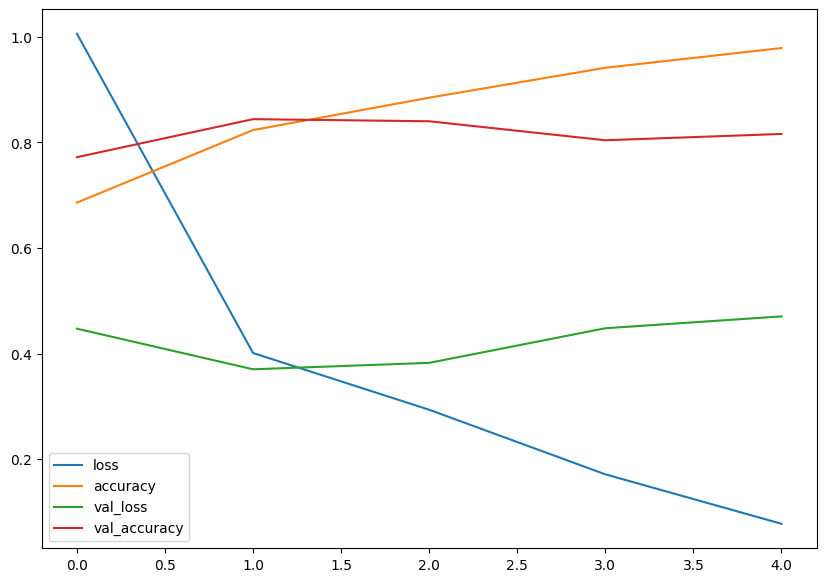

In [34]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))


In [35]:
# Plot the validation and training curves seperately
def loss_acc_curves(history):
  '''
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))  # number of epochs

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.show()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means it's learning the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

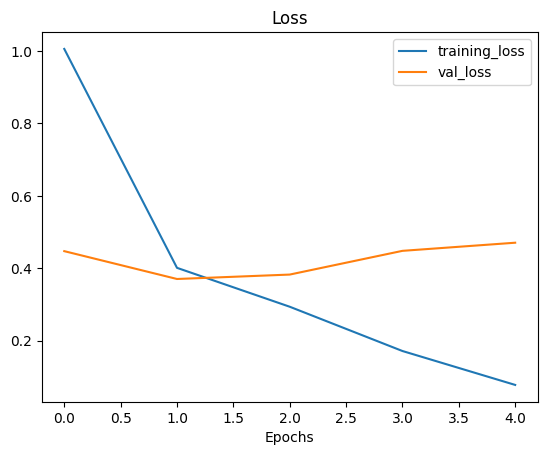

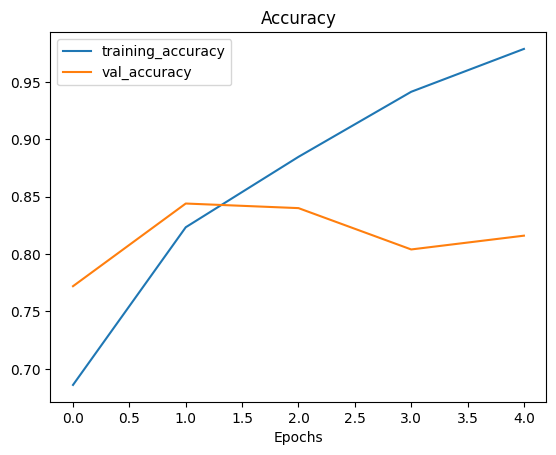

In [36]:
# Check out the loss and accuracy
loss_acc_curves(history_4)


> 🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differencers your model may be overfitting.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as regularization.

In [37]:
# Create a model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # Reduces input shape e.g. (222, 222, 3) -> (111, 111, 3)
  Conv2D(10, 3, activation="relu"), # (None, 109, 109, 10)
  MaxPool2D(pool_size=2), # (None, 54, 54, 10)
  Conv2D(10, 3, activation="relu"), # (None, 52, 52, 10)
  MaxPool2D(pool_size=2), # (None, 26, 26, 10)
  Flatten(), # (None, 6760)
  Dense(1, activation="sigmoid")
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 104ms/step - loss: 0.6276 - accuracy: 0.6413 - val_loss: 0.5405 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 5s 102ms/step - loss: 0.4919 - accuracy: 0.7707 - val_loss: 0.3937 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4125 - accuracy: 0.8227 - val_loss: 0.3596 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4172 - accuracy: 0.8180 - val_loss: 0.4087 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 5s 102ms/step - loss: 0.3786 - accuracy: 0.8427 - val_loss: 0.3454 - val_accuracy: 0.8440


In [38]:
# Get a summary of our model with max pooling
model_5.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

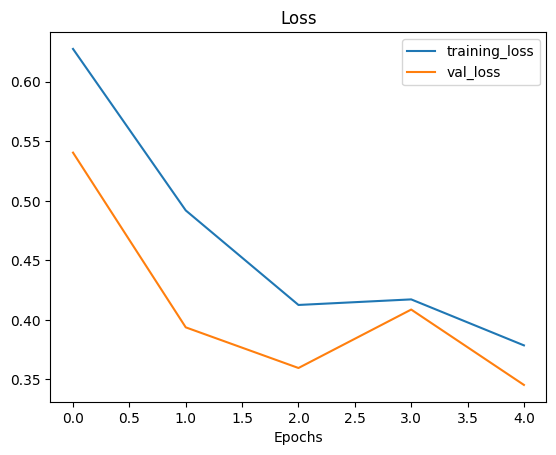

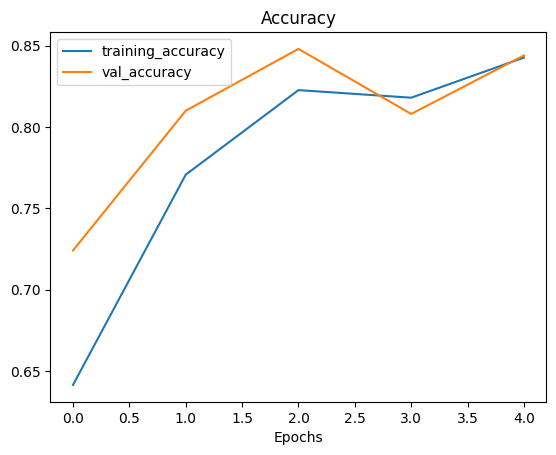

In [39]:
# Visualize loss and accuracy for model_5
loss_acc_curves(history_5)


### Opening our bag of tricks and finding data augmentation

In [40]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # Rotate the image
                                             shear_range=0.2, # Shear the image
                                             zoom_range=0.2, # Zoom in
                                             width_shift_range=0.2, # Shift the image width
                                             height_shift_range=0.3, # Shift the image height
                                             horizontal_flip=True)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more about the data and generalize (hopefully) patterns. Altering might mean adjusting an image by rotation, cropping or something like that.

Let's write some code to visualize data augmentation.

In [41]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

print('Non-Augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print('Non-Augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='binary')


Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data Augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [42]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented, only images


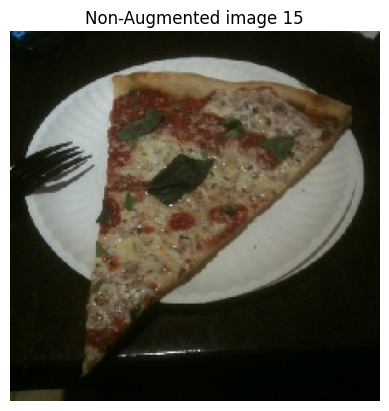

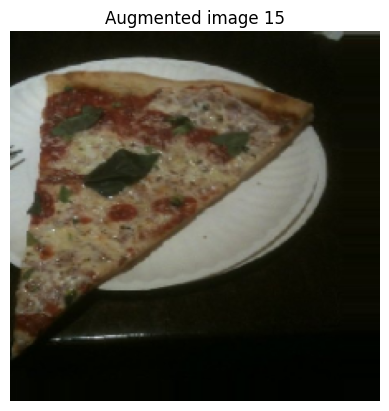

In [43]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31)

plt.figure()
plt.imshow(images[random_number])
plt.title(f"Non-Augmented image {random_number}")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image {random_number}")
plt.axis(False)
plt.show()


Now we've seen what augmented training data looks like, let's build a model and see how it learn on augmented data.

In [44]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 19s 383ms/step - loss: 0.7591 - accuracy: 0.3027 - val_loss: 0.6897 - val_accuracy: 0.6660
Epoch 2/5
47/47 [==============================] - 18s 390ms/step - loss: 0.6919 - accuracy: 0.5353 - val_loss: 0.6845 - val_accuracy: 0.5940
Epoch 3/5
47/47 [==============================] - 18s 390ms/step - loss: 0.6933 - accuracy: 0.5520 - val_loss: 0.6692 - val_accuracy: 0.5500
Epoch 4/5
47/47 [==============================] - 18s 388ms/step - loss: 0.6807 - accuracy: 0.5747 - val_loss: 0.6144 - val_accuracy: 0.7120
Epoch 5/5
47/47 [==============================] - 18s 385ms/step - loss: 0.6968 - accuracy: 0.6500 - val_loss: 0.6945 - val_accuracy: 0.5120


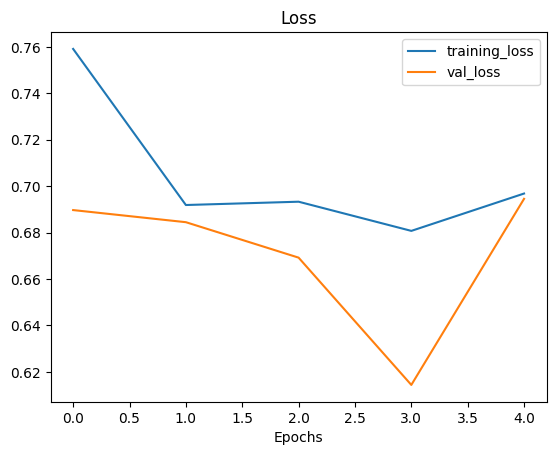

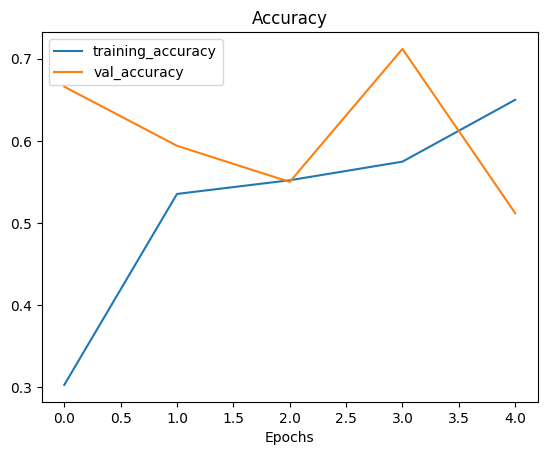

In [45]:
# Check our model's training curve
loss_acc_curves(history_6)

Let's shuffle our augmented training data and train another model (same as before) on it and see what happens

In [46]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

print('Non-Augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)

print('Non-Augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='binary')


Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data
Found 500 images belonging to 2 classes.


In [47]:
# Create a model (same as model_5 & model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 19s 381ms/step - loss: 0.6589 - accuracy: 0.5980 - val_loss: 0.5959 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 19s 396ms/step - loss: 0.6214 - accuracy: 0.6400 - val_loss: 0.5297 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 18s 386ms/step - loss: 0.5605 - accuracy: 0.7100 - val_loss: 0.4632 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 18s 392ms/step - loss: 0.5294 - accuracy: 0.7487 - val_loss: 0.4029 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 18s 387ms/step - loss: 0.4990 - accuracy: 0.7567 - val_loss: 0.3601 - val_accuracy: 0.8440


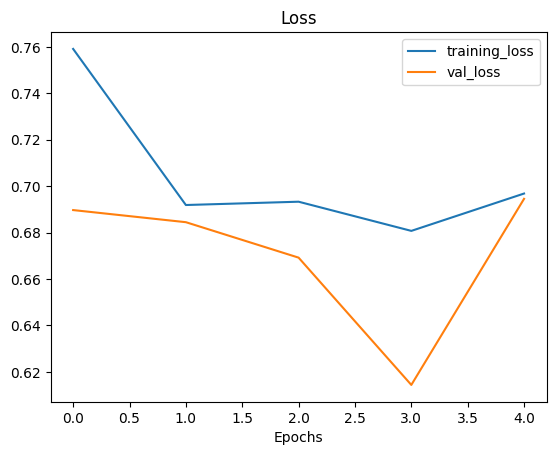

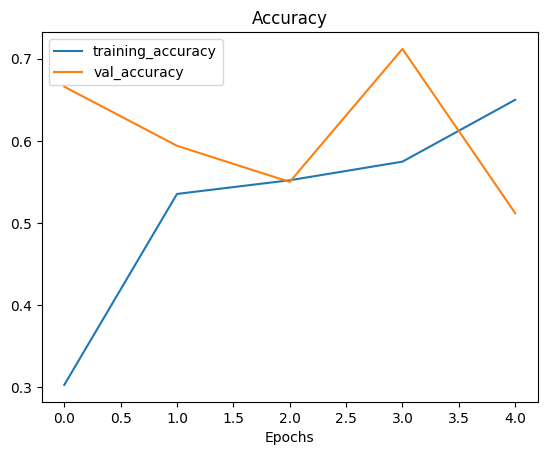

In [48]:
# Check our model's training curve
loss_acc_curves(history_6)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

> 📑 **Practice:** Recreate the model on the CNN explainer website (same as the `model_1`) and see how it o=performs on the augmented shuffled training data.

In [49]:
# Get model_1 summary
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [50]:
# Create the model (same as model_1)
model_8 = Sequential([
    Conv2D(16, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(16, 3, activation="relu"),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
47/47 [==============================] - 20s 385ms/step - loss: 0.6443 - accuracy: 0.6247 - val_loss: 0.4346 - val_accuracy: 0.8040
Epoch 2/10
47/47 [==============================] - 18s 382ms/step - loss: 0.5368 - accuracy: 0.7307 - val_loss: 0.4020 - val_accuracy: 0.8120
Epoch 3/10
47/47 [==============================] - 18s 384ms/step - loss: 0.5157 - accuracy: 0.7527 - val_loss: 0.4179 - val_accuracy: 0.8240
Epoch 4/10
47/47 [==============================] - 18s 390ms/step - loss: 0.4943 - accuracy: 0.7620 - val_loss: 0.4175 - val_accuracy: 0.8060
Epoch 5/10
47/47 [==============================] - 18s 385ms/step - loss: 0.4710 - accuracy: 0.7700 - val_loss: 0.3434 - val_accuracy: 0.8420
Epoch 6/10
47/47 [==============================] - 18s 387ms/step - loss: 0.4835 - accuracy: 0.7833 - val_loss: 0.3295 - val_accuracy: 0.8780
Epoch 7/10
47/47 [==============================] - 18s 384ms/step - loss: 0.4738 - accuracy: 0.7887 - val_loss: 0.3733 - val_accuracy: 0.8320

## Making a prediction with our trained model on our custom data

In [51]:
# Classes we're working on
class_names

array(['pizza', 'steak'], dtype='<U5')

--2024-02-28 15:59:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/1be0f77fbb4e056694a910f403a8f61f1b650eec/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2024-02-28 15:59:54 (89.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



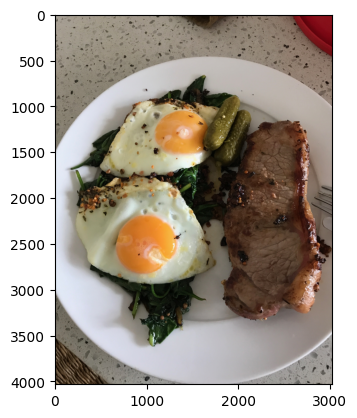

In [52]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/1be0f77fbb4e056694a910f403a8f61f1b650eec/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)


In [53]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you train a neural network and you want to make prediction with it on your own custom data, it's important to preprocess your custom data into the same format as the data your model was trained on.

In [54]:
# Create a function to import and image and resize it to be able to used with our model
def process_image(filename, img_shape=224):
  '''
  Reads an image from filenames, turns it into a tensor, reshapes it
  to (img_shape, img_shape, colour_channels).

  Args:
    filename (str): path to image
    img_shape (int): size to resize image to
  '''

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img


In [55]:
steak = process_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [56]:
model_1.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 196ms/step


array([[0.859505]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [57]:
# Remind ourselves of our classes
class_names

array(['pizza', 'steak'], dtype='<U5')

In [58]:
# We can index the predicted class by rounding of the prediction probability and indexing it on the class names
predicted_class = class_names[int(tf.round(model_1.predict(tf.expand_dims(steak, axis=0))))]
predicted_class

1/1 [==============================] - 0s 18ms/step


'steak'

In [59]:
def pred_plot(model, filename, class_names=class_names):
  '''
  Imports an image located at filename, makes a prediction on it with model and
  plots the image with the predicted class as the title.
  '''

  # Import the target image and preprocess it
  img = process_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 18ms/step


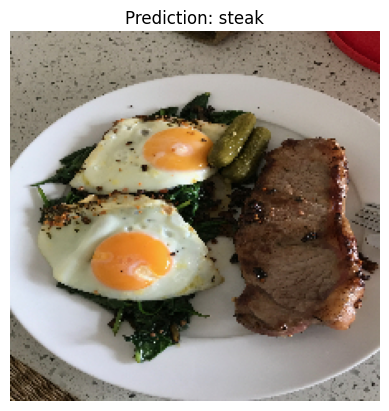

In [60]:
# Test our model on a custom image
pred_plot(model_1, '03-steak.jpeg', class_names)

--2024-02-28 16:02:24--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg [following]
--2024-02-28 16:02:24--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg [following]
--2024-02-28 16:02:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.gi

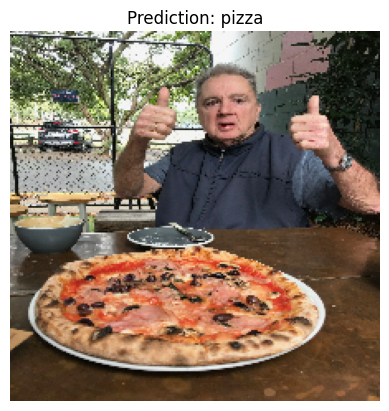

In [63]:
# Download another test custom image and make a prediction on it
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
pred_plot(model_1, '03-pizza-dad.jpeg?raw=true', class_names)


## An end-to-end multi-class image classification

We've jsut seen through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [68]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()


--2024-02-28 16:13:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.207, 108.177.127.207, 142.251.18.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  40.0MB/s    in 13s     

2024-02-28 16:13:44 (39.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [69]:
import os
# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [70]:
!ls -la 10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 Feb 28 16:13 .
drwxr-xr-x  1 root root 4096 Feb 28 16:13 ..
drwxr-xr-x 12 root root 4096 Feb 28 16:13 test
drwxr-xr-x 12 root root 4096 Feb 28 16:13 train


In [71]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'


In [72]:
# Let's get the subdirectories (these are our class names)
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


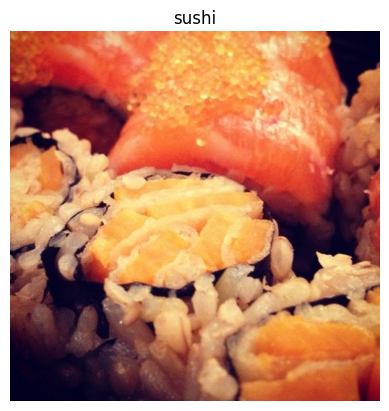

In [76]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))


### 2. Preprocess the data (prepare it for our multi-class model)

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [80]:
# Let's take a look at the images and labels
images, labels = train_data.next()


In [83]:
images.shape, len(images)

((32, 224, 224, 3), 32)

In [84]:
images[:2]

array([[[[0.7372549 , 0.7019608 , 0.72156864],
         [0.7372549 , 0.69803923, 0.7294118 ],
         [0.73333335, 0.69411767, 0.7254902 ],
         ...,
         [0.4784314 , 0.3803922 , 0.3019608 ],
         [0.4901961 , 0.38823533, 0.32156864],
         [0.47058827, 0.36862746, 0.3019608 ]],

        [[0.7607844 , 0.72156864, 0.75294125],
         [0.7607844 , 0.72156864, 0.75294125],
         [0.7568628 , 0.7176471 , 0.7490196 ],
         ...,
         [0.4666667 , 0.3803922 , 0.29803923],
         [0.48235297, 0.38431376, 0.30588236],
         [0.47058827, 0.37254903, 0.29411766]],

        [[0.7686275 , 0.7294118 , 0.7607844 ],
         [0.7686275 , 0.7294118 , 0.76470596],
         [0.76470596, 0.7254902 , 0.7607844 ],
         ...,
         [0.4784314 , 0.3921569 , 0.3019608 ],
         [0.4784314 , 0.3921569 , 0.30980393],
         [0.47450984, 0.38823533, 0.30588236]],

        ...,

        [[0.56078434, 0.49411768, 0.3254902 ],
         [0.56078434, 0.49411768, 0.3254902 ]

In [85]:
# Let's look at the labels of the first batch
labels, len(labels)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],


### Create a CNN model (start with a baseline)

We're going to create a CNN model to classify images of food, just like we did for pizza Vs steak.

In [88]:
# import all the statements to build a CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model_9 = Sequential([
    Conv2D(filters=32,
         kernel_size=3,
         activation='relu',
         input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
235/235 [==============================] - 25s 99ms/step - loss: 2.1137 - accuracy: 0.2403 - val_loss: 1.9841 - val_accuracy: 0.3036
Epoch 2/10
235/235 [==============================] - 24s 101ms/step - loss: 1.8961 - accuracy: 0.3425 - val_loss: 1.9011 - val_accuracy: 0.3380
Epoch 3/10
235/235 [==============================] - 24s 101ms/step - loss: 1.5703 - accuracy: 0.4665 - val_loss: 1.8636 - val_accuracy: 0.3768
Epoch 4/10
235/235 [==============================] - 24s 100ms/step - loss: 0.8290 - accuracy: 0.7265 - val_loss: 2.4205 - val_accuracy: 0.3540
Epoch 5/10
235/235 [==============================] - 25s 105ms/step - loss: 0.2422 - accuracy: 0.9272 - val_loss: 3.8476 - val_accuracy: 0.3032
Epoch 6/10
235/235 [==============================] - 25s 106ms/step - loss: 0.0711 - accuracy: 0.9808 - val_loss: 4.9800 - val_accuracy: 0.3080
Epoch 7/10
235/235 [==============================] - 23s 98ms/step - loss: 0.0526 - accuracy: 0.9843 - val_loss: 6.1067 - val_accu

Looks like our `model_9` is overfitting and we might need to use some techniques to fix that problem.

1. May be add more layers/neurons/filters
2. Adjust learning rate
3. Use regularization techniques

In [89]:
# Get the summary to inspect layers of model_9
model_9.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_29 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 110, 110, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_31 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 53, 53, 32)        0         
 ng2D)                                               

### 5. Evaluate the model

In [90]:
# Evaluate on the test data
model_9.evaluate(test_data)


79/79 [==============================] - 6s 73ms/step - loss: 7.4995 - accuracy: 0.2956


[7.4994587898254395, 0.2955999970436096]

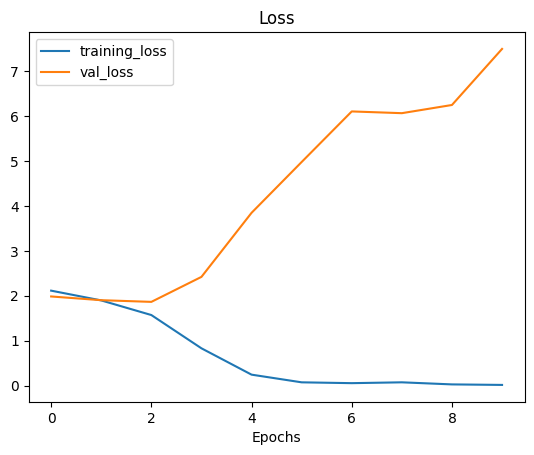

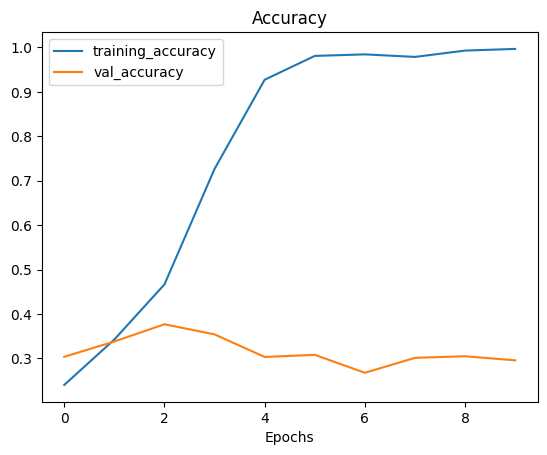

In [91]:
# Check out the model's loss and accuracy curves
loss_acc_curves(history_9)

**Conclusion:** Based on the obserbations, well our model is *overfitting* basically works exceptionally well on train data but struggles when it comes to test data.

### 6. Adjust different hyperparameters (tweak some parameters like learning rate and try to beat the baseline model)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well on unseen data.

So, let's try and fix that.

* **Get more data** - having more data gives a model opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complex for our data. So maybe reduce layers/neurons/filters, etc...
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns from another model that has learned on similar data to your own data and allows you to use those patterns on your own dataset.

In [92]:
# Simplify the model
model_10 = Sequential([
    Conv2D(filters=32,
         kernel_size=3,
         activation='relu',
         input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the simplified model
model_10.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit the model
history_10 = model_10.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
235/235 [==============================] - 27s 108ms/step - loss: 2.2410 - accuracy: 0.1737 - val_loss: 2.0736 - val_accuracy: 0.2524
Epoch 2/10
235/235 [==============================] - 23s 98ms/step - loss: 1.9757 - accuracy: 0.3136 - val_loss: 1.9355 - val_accuracy: 0.3328
Epoch 3/10
235/235 [==============================] - 24s 101ms/step - loss: 1.6372 - accuracy: 0.4487 - val_loss: 1.9565 - val_accuracy: 0.3316
Epoch 4/10
235/235 [==============================] - 24s 103ms/step - loss: 0.9755 - accuracy: 0.6780 - val_loss: 2.3016 - val_accuracy: 0.3232
Epoch 5/10
235/235 [==============================] - 24s 102ms/step - loss: 0.3674 - accuracy: 0.8875 - val_loss: 3.5711 - val_accuracy: 0.3072
Epoch 6/10
235/235 [==============================] - 23s 98ms/step - loss: 0.1171 - accuracy: 0.9671 - val_loss: 4.2782 - val_accuracy: 0.2748
Epoch 7/10
235/235 [==============================] - 25s 106ms/step - loss: 0.0490 - accuracy: 0.9891 - val_loss: 5.8404 - val_accu

In [93]:
# Get the model summary and compare with model_9
model_10.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 conv2d_34 (Conv2D)          (None, 107, 107, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 53, 53, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 89888)           

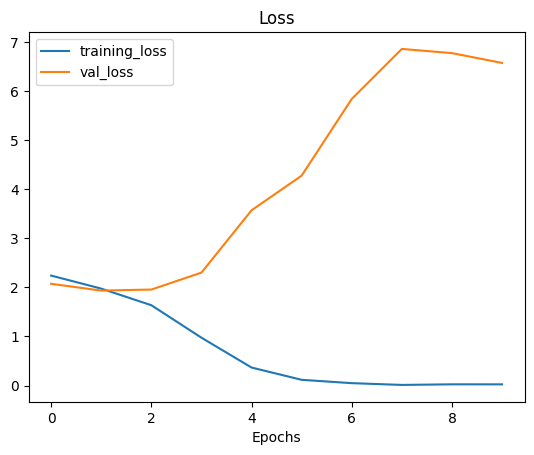

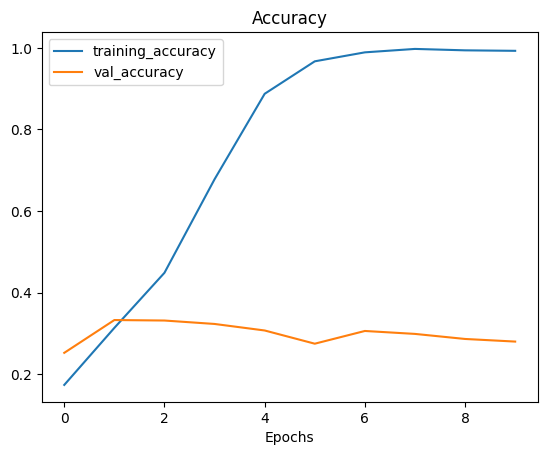

In [94]:
# Let's check out the loss/accuracy curves
loss_acc_curves(history_10)


**Conclusion:** Holy Sh*t (Pardon me for the language, lol) it's way worse than before

Okay, Let's try data augmentation (It may work or may not, Its all about experimentation and inference).

### Trying to reduce overfitting with data augmentation
Let's try and improve our model's results by using data augmentation...

Ideally, we want to:
 - Reduce overfitting (get the train and validation curves closer)
 - Improve validation accuracy

In [96]:
# Let's augment our data
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [98]:
# Let's create another model but this time we'll fit it on the augmented train data
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (using the same setup as previous models)
model_11.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy'])


In [99]:
model_9.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_29 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 110, 110, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_31 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 53, 53, 32)        0         
 ng2D)                                               

In [101]:
# Fit the model
history_11 = model_11.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
235/235 [==============================] - 90s 376ms/step - loss: 2.1294 - accuracy: 0.2268 - val_loss: 1.9683 - val_accuracy: 0.3136
Epoch 2/10
235/235 [==============================] - 89s 378ms/step - loss: 2.0010 - accuracy: 0.2916 - val_loss: 1.8816 - val_accuracy: 0.3380
Epoch 3/10
235/235 [==============================] - 89s 379ms/step - loss: 1.9190 - accuracy: 0.3261 - val_loss: 1.8996 - val_accuracy: 0.3448
Epoch 4/10
235/235 [==============================] - 89s 379ms/step - loss: 1.8483 - accuracy: 0.3675 - val_loss: 1.7460 - val_accuracy: 0.4008
Epoch 5/10
235/235 [==============================] - 90s 383ms/step - loss: 1.8016 - accuracy: 0.3857 - val_loss: 1.6575 - val_accuracy: 0.4380
Epoch 6/10
235/235 [==============================] - 88s 374ms/step - loss: 1.7476 - accuracy: 0.4069 - val_loss: 1.6613 - val_accuracy: 0.4320
Epoch 7/10
235/235 [==============================] - 91s 385ms/step - loss: 1.7125 - accuracy: 0.4208 - val_loss: 1.6187 - val_ac

In [102]:
# Evaluate the model
model_11.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 1.6074 - accuracy: 0.4852


[1.60737943649292, 0.4851999878883362]

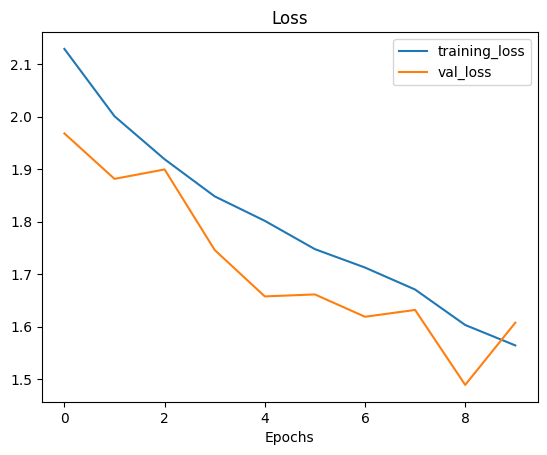

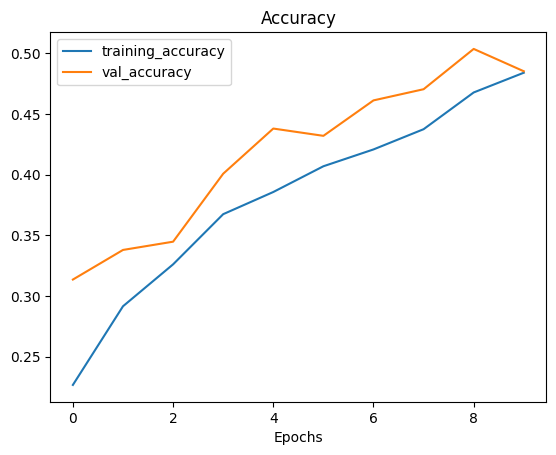

In [103]:
# Visualize our loss and acc curves
loss_acc_curves(history_11)

Noice! That looks much better, there has been an improvement in the validation loss and accuracy it went from `0.3` to `0.50`, I say we train for longer and there might be some significant improvements. (It'll taker longer duration cuz of augmentation)

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
-Try training for longer.
- Try **transfer learning**

### Make a prediction with our trained model

In [104]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [105]:
# Let's get the custom image
!wget https://myfoodstory.com/wp-content/uploads/2020/10/Dhaba-Style-Chicken-Curry-2-500x500.jpg
chicken = process_image('Dhaba-Style-Chicken-Curry-2-500x500.jpg')
chicken


--2024-02-28 17:52:47--  https://myfoodstory.com/wp-content/uploads/2020/10/Dhaba-Style-Chicken-Curry-2-500x500.jpg
Resolving myfoodstory.com (myfoodstory.com)... 172.67.197.29, 104.21.92.186, 2606:4700:3037::ac43:c51d, ...
Connecting to myfoodstory.com (myfoodstory.com)|172.67.197.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65627 (64K) [image/jpeg]
Saving to: ‘Dhaba-Style-Chicken-Curry-2-500x500.jpg’

Dhaba-Style-Chicken 100%[===================>]  64.09K  --.-KB/s    in 0.004s  

2024-02-28 17:52:47 (14.9 MB/s) - ‘Dhaba-Style-Chicken-Curry-2-500x500.jpg’ saved [65627/65627]



<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.46181753, 0.41868028, 0.43436655],
        [0.46234336, 0.4192061 , 0.4348924 ],
        [0.47221482, 0.42970783, 0.44507897],
        ...,
        [0.41501153, 0.39540368, 0.4189331 ],
        [0.18210064, 0.1624928 , 0.1860222 ],
        [0.29004067, 0.27043283, 0.29396224]],

       [[0.44828433, 0.40514705, 0.42083332],
        [0.47614077, 0.43300352, 0.4486898 ],
        [0.46554968, 0.42304265, 0.4384138 ],
        ...,
        [0.18684284, 0.167235  , 0.19076441],
        [0.22943245, 0.2098246 , 0.23335402],
        [0.3310178 , 0.31140995, 0.33493936]],

       [[0.48227978, 0.43914253, 0.4548288 ],
        [0.4892507 , 0.44611344, 0.4617997 ],
        [0.4566683 , 0.4141613 , 0.42953244],
        ...,
        [0.2494261 , 0.22981824, 0.2527174 ],
        [0.324281  , 0.30467317, 0.32820258],
        [0.18178737, 0.16217953, 0.18570894]],

       ...,

       [[0.10938391, 0.10154077, 0.10546234],
        [0.13

In [107]:
# Make prediction with the processed image
prediction = model_11.predict(tf.expand_dims(chicken, axis=0))
prediction


1/1 [==============================] - 0s 137ms/step


array([[8.5734904e-02, 8.5583049e-01, 4.4557222e-05, 1.3252075e-02,
        8.5875075e-03, 4.4923567e-05, 2.0811439e-03, 6.1648623e-03,
        2.8194698e-02, 6.4809610e-05]], dtype=float32)

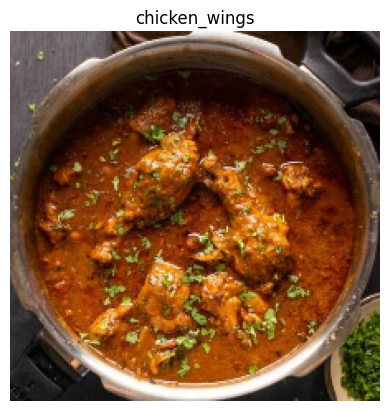

In [108]:
# Visualize the prediction
plt.imshow(chicken)
plt.axis(False)
plt.title(class_names[np.argmax(prediction)])
plt.show()


In [110]:
# Getting another custom image
!wget https://www.kitchensanctuary.com/wp-content/uploads/2022/09/Air-Fryer-Chicken-Curry-square-FS-36.jpg
curry = process_image('Air-Fryer-Chicken-Curry-square-FS-36.jpg')
curry


--2024-02-28 17:58:47--  https://www.kitchensanctuary.com/wp-content/uploads/2022/09/Air-Fryer-Chicken-Curry-square-FS-36.jpg
Resolving www.kitchensanctuary.com (www.kitchensanctuary.com)... 172.64.147.184, 104.18.40.72, 2606:4700:4400::ac40:93b8, ...
Connecting to www.kitchensanctuary.com (www.kitchensanctuary.com)|172.64.147.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203217 (198K) [image/jpeg]
Saving to: ‘Air-Fryer-Chicken-Curry-square-FS-36.jpg’

Air-Fryer-Chicken-C 100%[===================>] 198.45K  --.-KB/s    in 0.01s   

2024-02-28 17:58:47 (19.8 MB/s) - ‘Air-Fryer-Chicken-Curry-square-FS-36.jpg’ saved [203217/203217]



<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[7.6512605e-01, 4.7352940e-01, 5.1820729e-02],
        [7.8735495e-01, 4.5943880e-01, 1.8707487e-03],
        [7.1434075e-01, 3.8905561e-01, 9.4487732e-03],
        ...,
        [3.4327719e-01, 4.5700267e-01, 2.0602228e-01],
        [3.1984314e-01, 4.3356866e-01, 1.8258825e-01],
        [3.3585426e-01, 4.4957975e-01, 1.9075625e-01]],

       [[6.9817930e-01, 3.9481795e-01, 0.0000000e+00],
        [7.4651366e-01, 4.0702781e-01, 4.2266930e-03],
        [6.9176167e-01, 3.6234993e-01, 0.0000000e+00],
        ...,
        [3.1434092e-01, 4.2806643e-01, 1.6532134e-01],
        [3.3036083e-01, 4.4311076e-01, 1.9310649e-01],
        [3.1774214e-01, 4.2787123e-01, 1.9113135e-01]],

       [[7.2164369e-01, 4.1568628e-01, 0.0000000e+00],
        [7.0529211e-01, 3.5226589e-01, 0.0000000e+00],
        [6.9453776e-01, 3.4943980e-01, 7.5029768e-04],
        ...,
        [2.5042057e-01, 3.6414605e-01, 1.0532253e-01],
        [3.0465207e-01

In [111]:
# make a prediction
prediction_1 = model_11.predict(tf.expand_dims(curry, axis=0))
prediction_1


1/1 [==============================] - 0s 18ms/step


array([[1.18643686e-01, 2.52783373e-02, 9.79469623e-05, 4.94894028e-01,
        1.33549841e-03, 3.81606515e-05, 9.89929540e-04, 7.74159208e-02,
        1.30337164e-01, 1.50969341e-01]], dtype=float32)

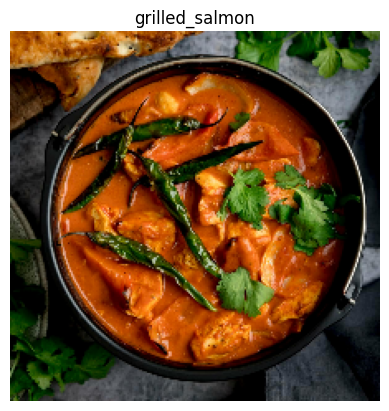

In [112]:
# Visualize the prediction
plt.imshow(curry)
plt.axis(False)
plt.title(class_names[np.argmax(prediction_1)])
plt.show()


--2024-02-28 18:04:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.03s   

2024-02-28 18:04:43 (108 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

1/1 [==============================] - 0s 17ms/step


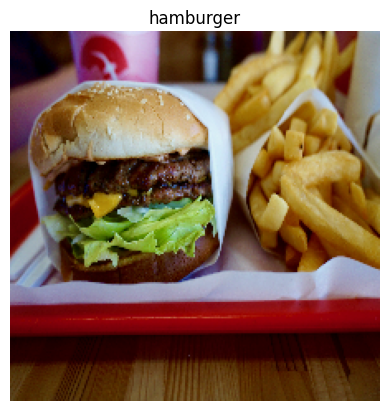

In [114]:
# Getting another image github
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
hamburger = process_image('03-hamburger.jpeg')

# Make predictions
prediction_2 = model_11.predict(tf.expand_dims(hamburger, axis=0))

# Visualize the model
plt.imshow(hamburger)
plt.axis(False)
plt.title(class_names[np.argmax(prediction_2)])
plt.show()
